# Step 1: Import Required Libraries

In [1]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Step 2: Define Paths

In [2]:
BASE_PATH = "snapshots"
MODEL_PATH = os.path.join(BASE_PATH, "models")
HISTORY_PATH = os.path.join(BASE_PATH, "histories")
PLOTS_PATH = os.path.join(BASE_PATH, "plots")
HYPERPARAMS_FILE = os.path.join(BASE_PATH, "hyperparams.json")

# Check if directories exist
if not os.path.exists(BASE_PATH):
    raise FileNotFoundError("Training logs folder not found. Ensure files are correctly placed.")

# Load Hyperparameters
if os.path.exists(HYPERPARAMS_FILE):
    with open(HYPERPARAMS_FILE, "r") as f:
        hyperparams = json.load(f)
    IMAGE_SIZE = tuple(hyperparams.get("image_size", (128, 128)))
    BATCH_SIZE = hyperparams.get("batch_size", 32)
    EPOCHS = hyperparams.get("epochs", 10)
else:
    IMAGE_SIZE = (128, 128)
    BATCH_SIZE = 32
    EPOCHS = 10
    print("Warning: hyperparams.json not found. Using default values.")

# Step 3: Load Dataset

In [3]:
X_path = "../Normal_Analysis/cnn_processed_data/X.npy"
y_path = "../Normal_Analysis/cnn_processed_data/y.npy"

if os.path.exists(X_path) and os.path.exists(y_path):
    print("Loading dataset from .npy files...")
    X = np.load(X_path)
    y = np.load(y_path)
else:
    raise FileNotFoundError("Dataset files (X.npy, y.npy) not found. Ensure they are placed in the correct directory.")

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Loading dataset from .npy files...


# Step 4: Load Trained Model

In [4]:
def load_model(model_name):
    """Loads a saved model from .h5 file"""
    model_file = os.path.join(MODEL_PATH, f"{model_name}.h5")

    if os.path.exists(model_file):
        print(f"Loading model: {model_name}")
        return keras.models.load_model(model_file)
    else:
        raise FileNotFoundError(f"Model file {model_name}.h5 not found in {MODEL_PATH}")

# Step 5: Load Training History

In [5]:
def load_history(model_name):
    """Loads training history from .json file"""
    history_file = os.path.join(HISTORY_PATH, f"{model_name}.json")

    if os.path.exists(history_file):
        with open(history_file, "r") as f:
            history = json.load(f)
        return history
    else:
        print(f"Warning: Training history for {model_name} not found.")
        return None

# Step 6: Plot Training History

In [6]:
def plot_history(model_name, history):
    """Plots accuracy and loss curves for training"""
    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history["accuracy"], label="Train Accuracy")
    plt.plot(history["val_accuracy"], label="Validation Accuracy")
    plt.legend()
    plt.title(f"{model_name} - Accuracy over epochs")

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history["loss"], label="Train Loss")
    plt.plot(history["val_loss"], label="Validation Loss")
    plt.legend()
    plt.title(f"{model_name} - Loss over epochs")

    plt.show()

# Step 7: Evaluate a Model

In [7]:
def evaluate_model(model_name):
    """Loads and evaluates the model"""
    try:
        model = load_model(model_name)
        history = load_history(model_name)

        # Evaluate on validation set
        val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
        print(f"{model_name} - Validation Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")

        # Plot training history if available
        if history:
            plot_history(model_name, history)

    except Exception as e:
        print(f"Error evaluating {model_name}: {e}")

# Step 8: Test and Evaluate Models

Loading model: baseline_cnn


baseline_cnn - Validation Accuracy: 0.9768, Loss: 0.1619


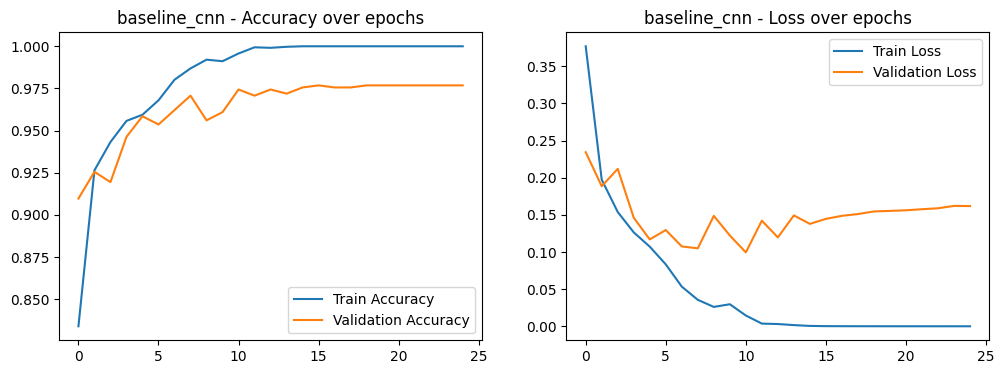

Loading model: vgg_like


vgg_like - Validation Accuracy: 0.9609, Loss: 0.2767


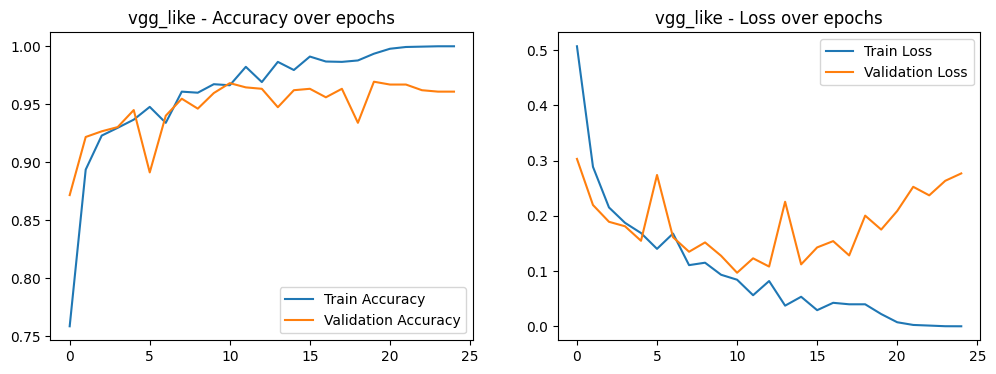

Loading model: resnet_like


resnet_like - Validation Accuracy: 0.9548, Loss: 0.2748


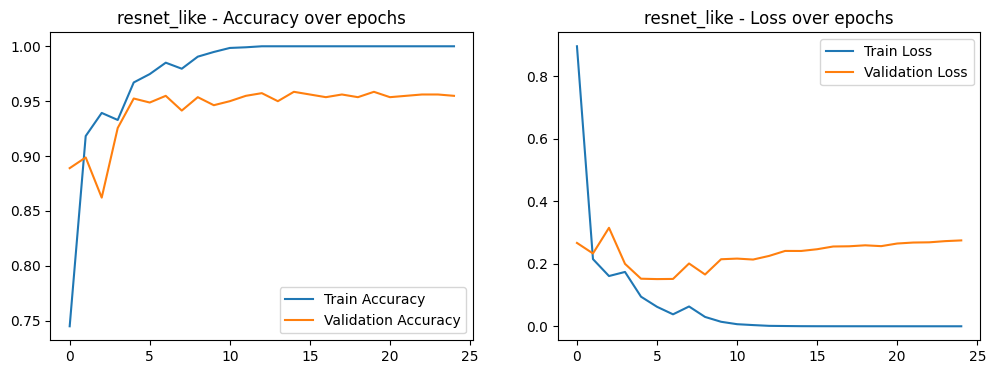

Loading model: mobilenet


mobilenet - Validation Accuracy: 0.4383, Loss: 2.3555


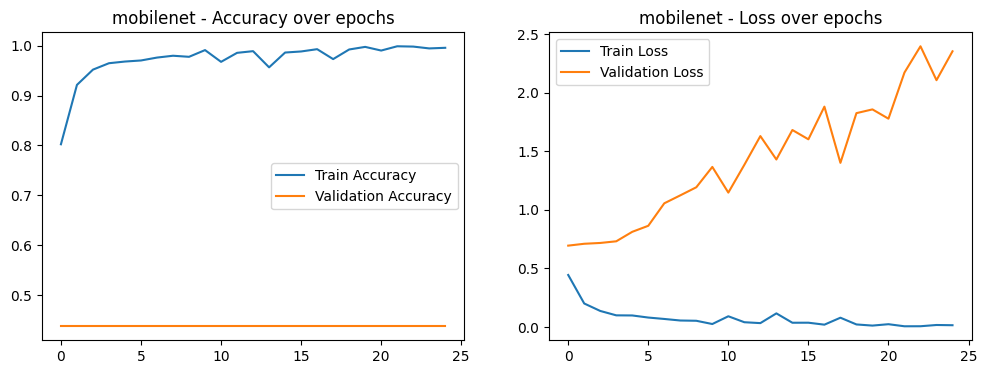


All models evaluated successfully!


In [8]:
MODEL_NAMES = ["baseline_cnn", "vgg_like", "resnet_like", "mobilenet"]

for model_name in MODEL_NAMES:
    evaluate_model(model_name)

print("\nAll models evaluated successfully!")

# **📊 Model Performance Analysis**  

## **Overview**  
We trained four different CNN models on our dataset and evaluated them on the validation set. Below are the **validation accuracy** and **loss** scores for each model.  

| Model        | Validation Accuracy | Validation Loss |
|-------------|---------------------|----------------|
| **Baseline CNN** | **97.68%**  | **0.1619**  |
| **VGG-like CNN** | 96.09%  | 0.2767  |
| **ResNet-like CNN** | 95.48%  | 0.2748  |
| **MobileNet** | 🚨 **43.83%**  | 🚨 **2.3555**  |

---

## **⚡ Key Observations**  

### ✅ **1. Baseline CNN Performs the Best**  
- **Highest accuracy (97.68%)** and **lowest loss (0.1619)** among all models.  
- This suggests that a relatively simple CNN architecture is already effective for this dataset.  
- A deeper model is not necessarily required.  

### ⚖️ **2. VGG-like & ResNet-like Perform Well, But Slightly Worse Than Baseline**  
- Both **VGG-like (96.09%)** and **ResNet-like (95.48%)** models achieve high accuracy, but they have **higher loss values (~0.27)** compared to the Baseline CNN.  
- This could mean they are overfitting slightly or not generalizing as well as the simpler model.  
- Further tuning (e.g., **batch size, learning rate, dropout**) might be needed.  

### ❌ **3. MobileNet Fails Miserably**  
- **Validation accuracy drops to 43.83%** (essentially random guessing).  
- **Loss skyrockets to 2.3555**, indicating training instability.  
- Possible reasons:  
  - **MobileNet is designed for transfer learning** and might need pretrained weights to work properly.  
  - **Hyperparameters (e.g., learning rate, optimizer)** may need tuning.  
  - **Requires more training epochs** to converge properly.  

---

## **🚀 Next Steps & Improvements**  

### **🔹 Fixing MobileNet Issues**  
- **Use pretrained weights** (`weights="imagenet"`) instead of training from scratch.  
- **Increase training epochs** (MobileNet models often need longer training).  
- **Fine-tune only the top layers** instead of training the entire model.  

### **🔹 Improving Generalization**  
- **Try different optimizers** (e.g., AdamW, RMSprop) to improve learning.  
- **Add dropout layers** to reduce overfitting in deeper models.  
- **Use learning rate scheduling** to stabilize training.  

### **🔹 Experiment with More Architectures**  
- Try **EfficientNet**, **DenseNet**, or other advanced CNN architectures.  
- Combine **ensemble learning** (e.g., averaging predictions from multiple models).  

---

## **🏆 Final Verdict**  
✅ **Baseline CNN is the best model for now** – simple, effective, and highest accuracy.  
⚠️ **VGG-like and ResNet-like are promising** but require fine-tuning.  
❌ **MobileNet is failing** and needs major adjustments.  

👉 Next, we should **fix MobileNet, try transfer learning, and optimize hyperparameters** for deeper models. 🚀